In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

arquivo = 'imd_notas.xlsx'
excel = pd.ExcelFile(arquivo)
print(excel.sheet_names)
dados = excel.parse(0)



['Notas']


In [14]:
#1)
#A

#for i in dados['disciplina_ID'].unique():
 #   print("Disciplina ID ", i, " = ", dados['disciplina_ID'].value_counts()[i]/dados.drop_duplicates(subset=['disciplina_ID', 'a_ID'])["disciplina_ID"].value_counts()[i])

#Esse cálculo não leva em consideração os alunos que reprovaram e não conseguiram aprovação em outros períodos.
    
    
list_aprovados = list( {} for i in range(len(dados['disciplina_ID'].unique())) )

row=-1
for j in dados['disciplina_ID'].unique(): #disciplinas
    row = row+1
    list_aprovados[row]['aprovados']=0
    list_aprovados[row]['reprovados']=0
    
for i in dados['a_ID'].unique():  #alunos
    row=-1
    for j in dados['disciplina_ID'].unique(): #disciplinas
        row = row+1
        if( dados.loc[(dados['a_ID'] == i) & (dados['disciplina_ID'] == j) & (dados['status.disciplina'] == 'Aprovado')]["a_ID"].value_counts().empty == False):
            list_aprovados[row]['aprovados'] = list_aprovados[row]['aprovados'] + 1
            reprovacoes = dados.loc[(dados['a_ID'] == i) & (dados['disciplina_ID'] == j) & (dados['status.disciplina'] == 'Reprovado')]["a_ID"].value_counts()
            if( reprovacoes.empty == False):
                list_aprovados[row]['reprovados'] = list_aprovados[row]['reprovados'] + reprovacoes[i]

row=-1
total_reprovados=0
total_aprovados=0
for j in dados['disciplina_ID'].unique(): #disciplinas
    row = row+1
    total_reprovados = total_reprovados + list_aprovados[row]['reprovados']
    total_aprovados = total_aprovados + list_aprovados[row]['aprovados']
    
    if(list_aprovados[row]['aprovados'] != 0):
        print("Disciplina ID = ", j, " taxa = ", (list_aprovados[row]['aprovados']+list_aprovados[row]['reprovados'])/list_aprovados[row]['aprovados'] )
             

#B
print("\n\nGeral = ", (total_reprovados+total_aprovados)/total_aprovados )

Disciplina ID =  0  taxa =  1.27138643068
Disciplina ID =  1  taxa =  1.02702702703
Disciplina ID =  2  taxa =  1.12423625255
Disciplina ID =  3  taxa =  1.33333333333
Disciplina ID =  4  taxa =  1.0313111546
Disciplina ID =  5  taxa =  1.35907335907
Disciplina ID =  6  taxa =  1.08992805755


Geral =  1.13595056343


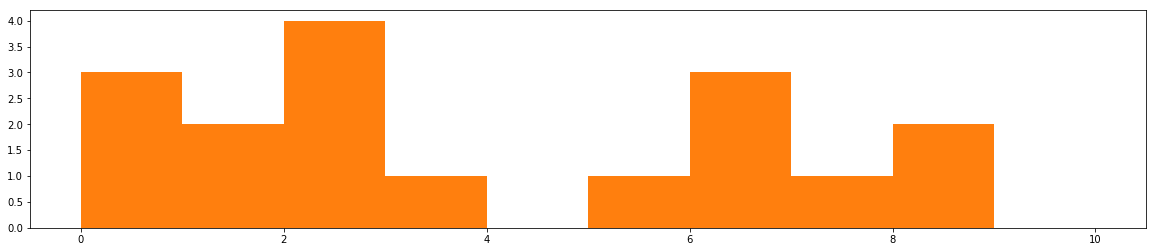

In [18]:
#2

fig = plt.figure(figsize=(20,4))
ax1 = fig.add_subplot(1,1,1)
ax1.hist(dados['CEP'], range=(0,10))
ax1.hist(dados['nota'], range=(0,10))

plt.show()

#print(dados.groupby(['CEP', 'status.disciplina'])['status.disciplina'].value_counts())


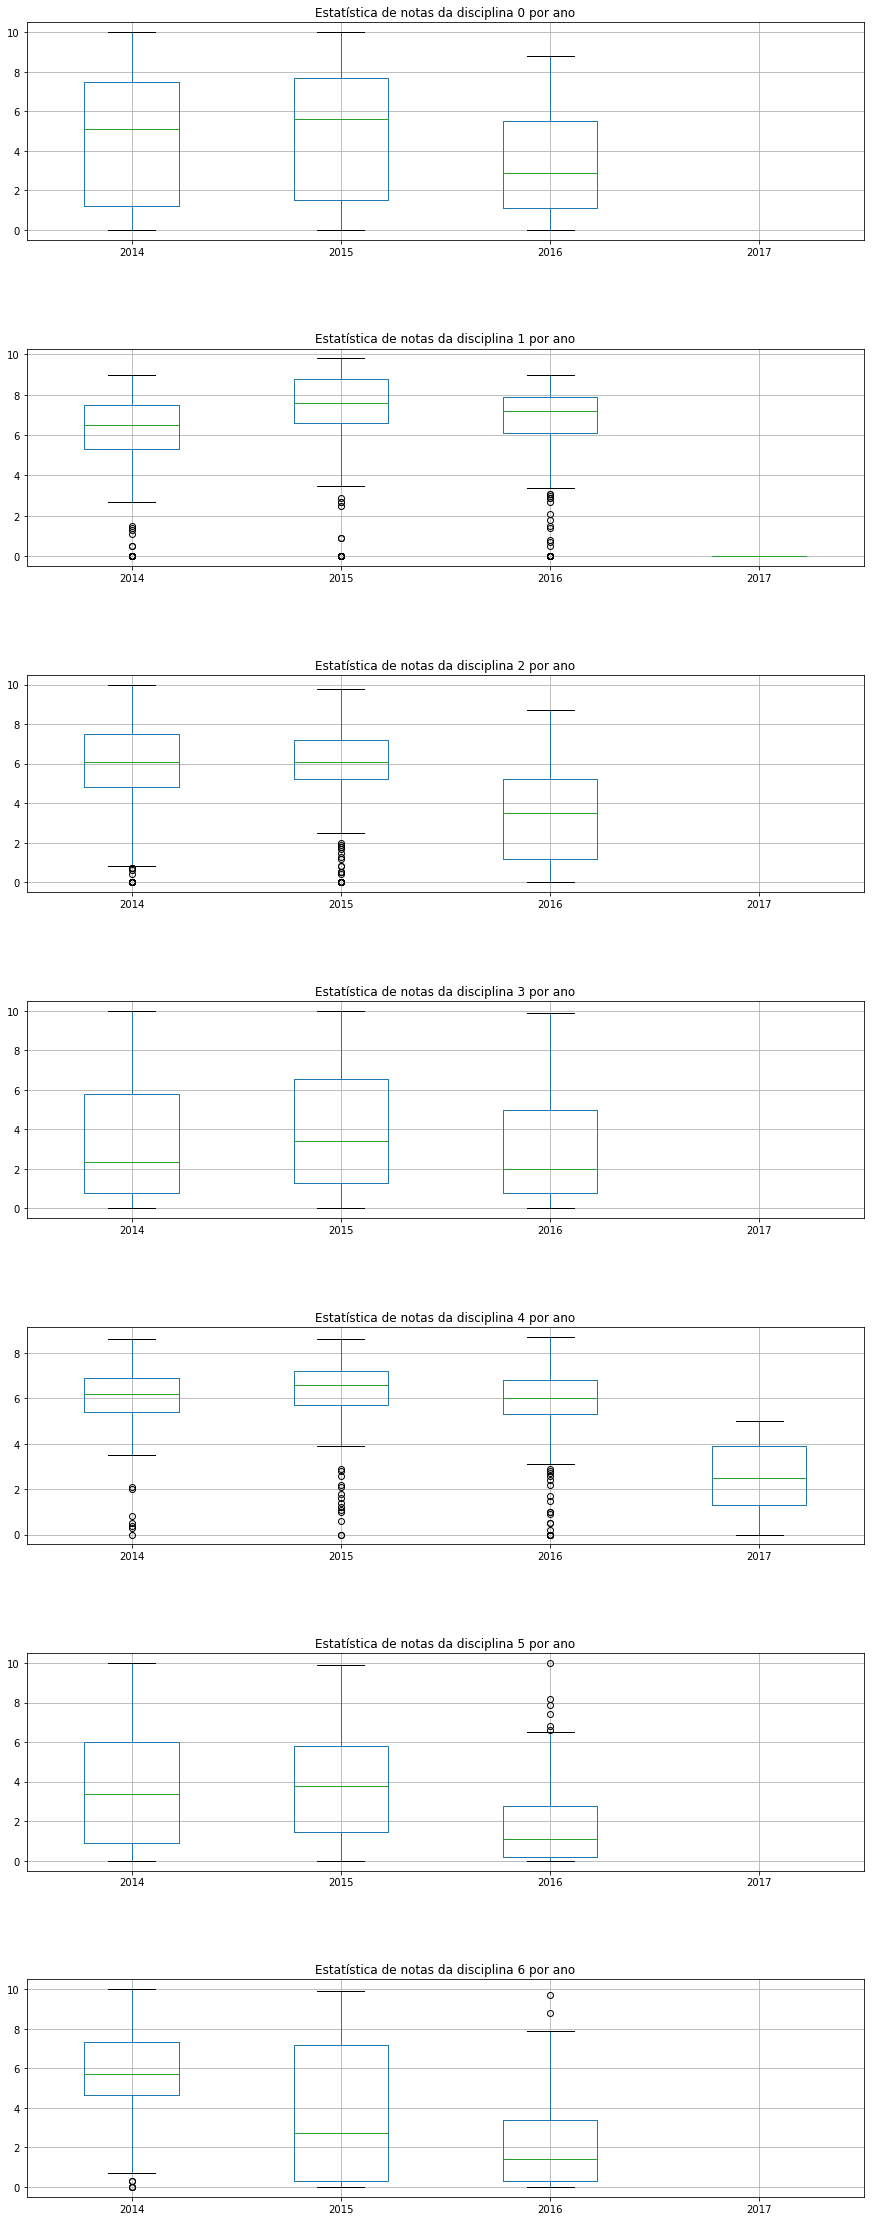

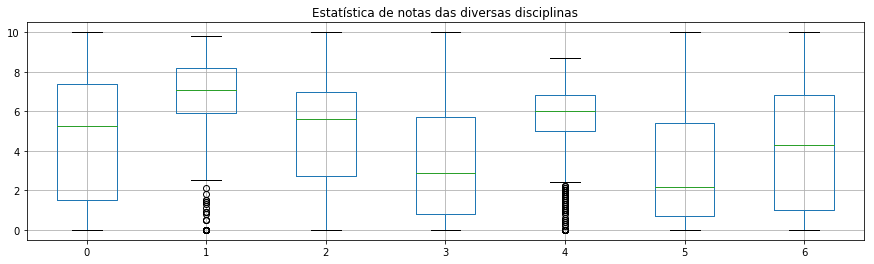

In [12]:
#3

#a
list_ano = dados['ano_disciplina'].unique()
list_disciplinas = dados['disciplina_ID'].unique()
fig3a, axes3a = plt.subplots(nrows=7, ncols=1, figsize=(15,40))
count1 = 0

   
for disc in list_disciplinas:
    dados3a = pd.DataFrame()
    axes3a[count1].title.set_text('Estatística de notas da disciplina '+str(disc)+' por ano')
    
    for ano in list_ano:
        dados3a[ano] =  pd.Series(dados.loc[(dados['disciplina_ID'] ==disc) & (dados['ano_disciplina'] ==ano)]['nota'].tolist())

    dados3a.boxplot(ax=axes3a[count1])    
    count1 = count1+1
    
fig3a.subplots_adjust(hspace=.5)


#b
fig3b = plt.figure(figsize=(15,4))
df = pd.DataFrame()

for disc in list_disciplinas:
    df[disc]=pd.Series(dados.loc[dados['disciplina_ID'] == disc]['nota'].tolist())

df.boxplot()
plt.title('Estatística de notas das diversas disciplinas')
plt.show()



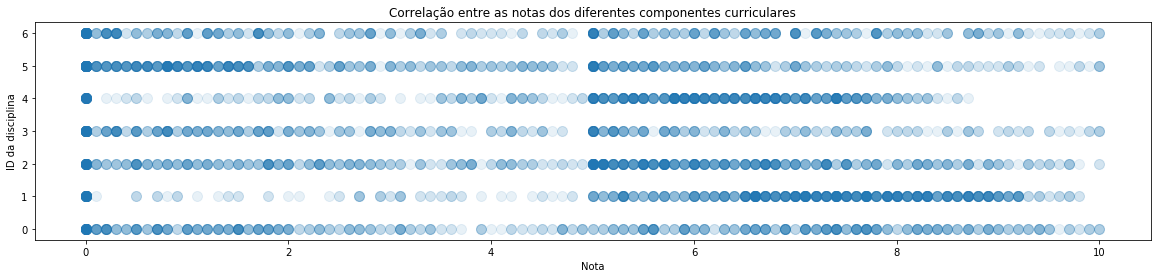

In [15]:
#4
fig2 = plt.figure(figsize=(20,4))
plt.title('Correlação entre as notas dos diferentes componentes curriculares')
plt.xlabel('Nota')
plt.ylabel('ID da disciplina')
X = dados['nota']
Y = dados['disciplina_ID']
plt.scatter(X,Y, alpha=0.1, s=100)

plt.show()


In [359]:
#5

fig5 = plt.figure(figsize=(20,4))

#dados["num_d"] = dados.loc[dados['ano_disciplina'] == 2015]['nota']

#d = pd.pivot_table(df,index='ID',columns='subindex',values='count').fillna(0)

#df = pd.DataFrame({'0':dados.loc[dados['disciplina_ID'] == 0]['nota'], })
#dados2 = dados.loc[dados['disciplina_ID'] == 0]['nota']

#print(dados.groupby(['a_ID', 'ano_disciplina'])['periodo_disciplina'].value_counts().head())

#print(dados.groupby(['a_ID', 'ano_disciplina', 'periodo_disciplina']))

#print(dados.pivot_table(index=["a_ID", 'ano_disciplina'], values="periodo_disciplina", aggfunc=np.mean).head())

#for aluno in dados.groupby(['a_ID']):
 #   print(aluno["ano_disciplina"])

#print(dados.groupby(['CEP', 'status.disciplina'])['status.disciplina'].value_counts())

#Y = dados.groupby(['a_ID', 'ano_disciplina'])['periodo_disciplina'].value_counts()
#X = dados.groupby(['a_ID', 'ano_disciplina', 'periodo_disciplina'])['nota'].mean()
#plt.scatter(X,Y, alpha=0.1, s=100)

#plt.title("Relação entre o número médio de disciplinas cursadas por aluno e o seu desempenho")
#plt.xlabel("Número de disciplinas")
#plt.ylabel("Nota média do aluno")

#plt.show()



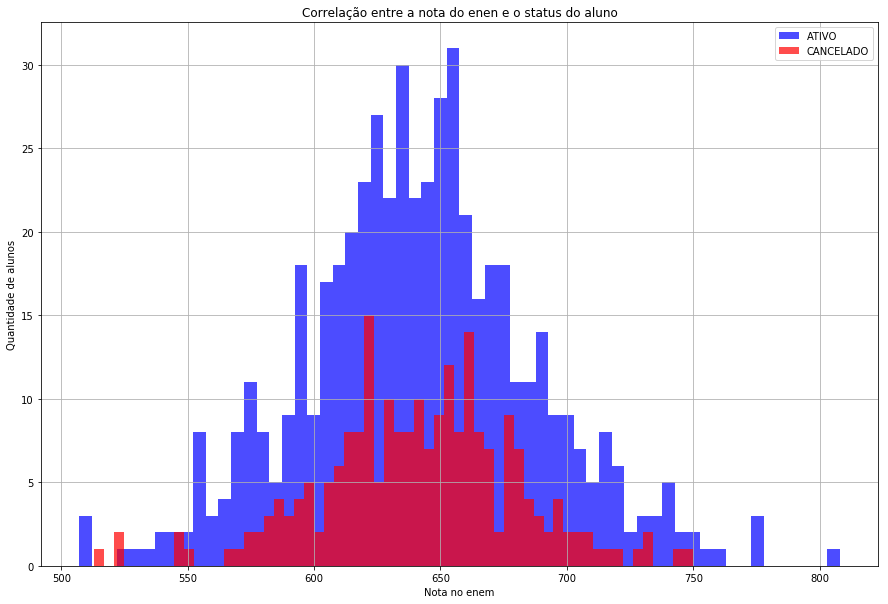

In [323]:
#6

fig6 = plt.figure(figsize=(15,10))

#d = pd.pivot_table(df,index='ID',columns='subindex',values='count').fillna(0)

ativo = dados.loc[dados['status'] == "ATIVO"].drop_duplicates(subset='a_ID')
cancelado = dados.loc[dados['status'] == "CANCELADO"].drop_duplicates(subset='a_ID')

ativo["enen-nota"].hist(color="blue", label="ATIVO", bins=60, alpha=0.7)
cancelado["enen-nota"].hist(color="red", label="CANCELADO", bins=60, alpha=0.7)

plt.legend()
plt.xlabel('Nota no enem')
plt.ylabel('Quantidade de alunos')
plt.title("Correlação entre a nota do enen e o status do aluno")
plt.show()



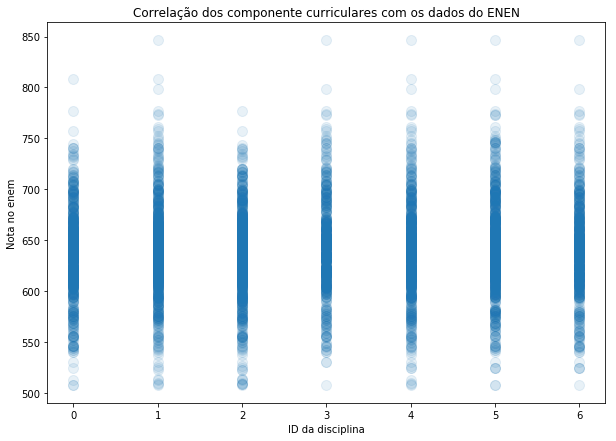

In [363]:
#7
%matplotlib inline

fig2 = plt.figure(figsize=(10,7))

#d = pd.pivot_table(df,index='ID',columns='subindex',values='count').fillna(0)

Y = dados['enen-nota']
X = dados['disciplina_ID']
plt.scatter(X,Y, alpha=0.1, s=100)
plt.xlabel('ID da disciplina')
plt.ylabel('Nota no enem')
plt.title("Correlação dos componente curriculares com os dados do ENEN")
plt.show()

